---
<h1 align='center' style="color:green">Image Segmentation (Watershed Algorithm)</h1>

---

#### Image segmentation is the task of classifying every pixel in the image to some class. For example, classifying every pixel as foreground or background. Image segmentation is important for extracting the relevant parts from an image.

#### The watershed algorithm is a classic image segmentation algorithm. It considers the pixel values in an image as topography. For finding the object boundaries, it takes initial markers as input. The algorithm then starts flooding the basin from the markers till the markers meet at the object boundaries.
---
<img src='images/watershed.gif'>

---
#### Let’s say we have a topography with multiple basins. Now, if we fill different basins with water of different color, then the intersection of different colors will give us the object boundaries. This is the intuition behind the watershed algorithm.
---

### 1. Import the libraries

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the image

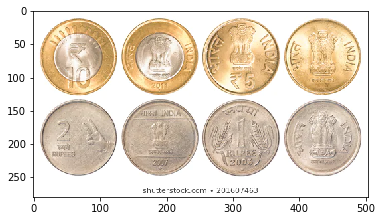

In [41]:
image=cv2.imread("images/coin.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

### 3. Convert image into Grayscale format n apply threshfold

In [42]:
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image)

# Apply thresholding
ret,thresh=cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

### 4. Get a kernel

In [43]:
kernel=np.ones((3,3),np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [44]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

### 5. Extract the background from image

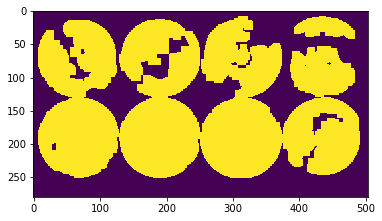

In [48]:
sure_bg=cv2.dilate(opening,kernel,iterations=3)

dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

sure_fg=np.uint8(sure_fg)
unknown=cv2.subtract(sure_bg,sure_bg)

ret,markers=cv2.connectedComponents(sure_fg)

markers=markers+1

markers[unknown==255]=0

markers=cv2.watershed(image,markers)
image[markers==1]=[255,0,0]

plt.imshow(sure_bg)

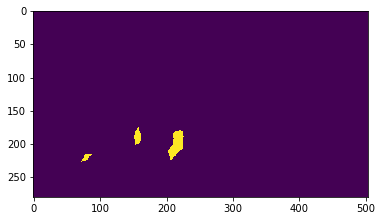

In [49]:
plt.imshow(sure_fg)